In [9]:
# 차원 축소
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 준비
df = pd.read_csv("C:\\Users\\HomePc\\Desktop\\데이터분석수업\\강의용데이터\\data\\iris.csv")
df = df.drop('Species', axis=1)
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# 데이터 표준화
scaler = StandardScaler()
result = scaler.fit_transform(df)
df_scaled = pd.DataFrame(result,columns=df.columns)
df_scaled.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [8]:
# 차원 축소
pca = PCA(n_components=2)
transform = pca.fit_transform(df_scaled)    #2차원으로 축소
transform = pd.DataFrame(transform)
transform.head()

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


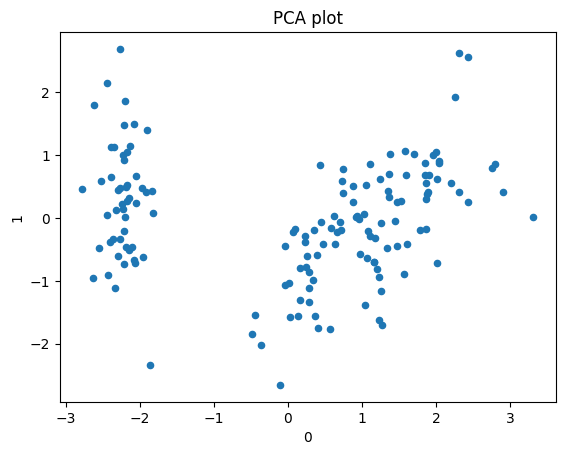

In [6]:
# 시각화
transform.plot.scatter(x=0,y=1,                 # 산점도
                       title='PCA plot')
plt.show()

In [1]:
# k-평균 군집화
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
df = pd.read_csv("C:\\Users\\HomePc\\Desktop\\데이터분석수업\\강의용데이터\\data\\iris.csv")
df = df.drop('Species', axis=1)
df.head()



,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
# 데이터 표준화
scaler = StandardScaler()
result = scaler.fit_transform(df)
df_scaled = pd.DataFrame(result, columns=df.columns)
df_scaled.head()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [3]:
# 군집화
model = KMeans(n_clusters=3, n_init=10, random_state=123)
model.fit(df_scaled)


KMeans(n_clusters=3, n_init=10, random_state=123)

In [ ]:
# 군진화 결과 확인
model.cluster_centers_  # 군집 중심점 좌표

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [ ]:
model.labels_    # 각 행의 군집 번호

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
model.inertia_  # 군집 평가 점수

139.8204963597497

In [ ]:
# 차원 축소
pca = PCA(n_components=2)
transform = pca.fit_transform(df_scaled)   # 2차원으로 축소
transform = pd.DataFrame(transform)
transform['cluster'] = model.labels_       # 군집 정보 추가
transform.head()

,0,1,cluster
0,-2.264703,0.480027,1
1,-2.080961,-0.674134,1
2,-2.364229,-0.341908,1
3,-2.299384,-0.597395,1
4,-2.389842,0.646835,1


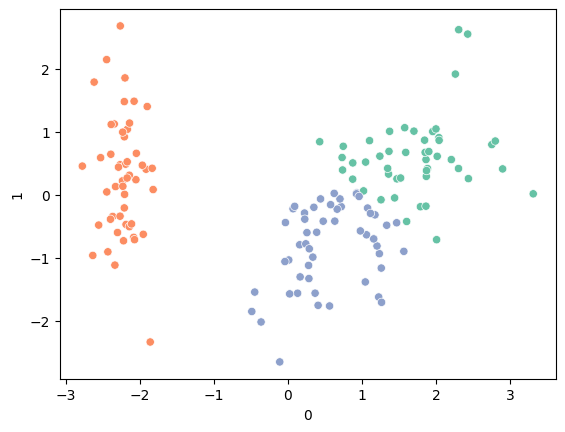

In [8]:
# 시각화

sns.scatterplot(
    data=transform,
    x = 0,
    y = 1,
    hue="cluster",
    palette='Set2',
    legend=False
)

plt.show()

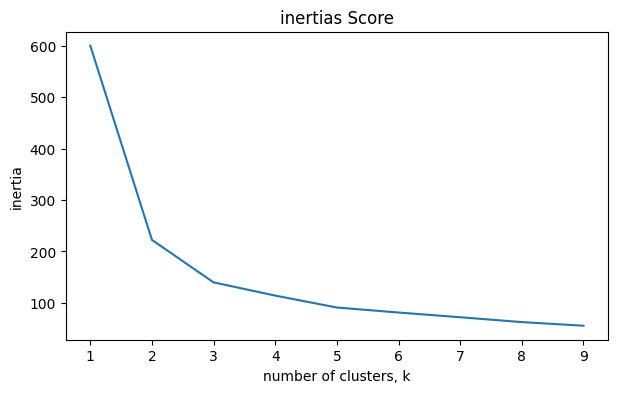

In [12]:
# 적절한 k-값 결정
ks = range(1,10)        # 군집의 개수
inertias = pd.Series([])    # 군집화 평가 결과


for k in ks:
    model = KMeans(n_clusters=k,
                   n_init=10,random_state=123)
    model.fit(df_scaled)
    inertias.loc[k] = model.inertia_
    
plt.figure(figsize=(7,4))
inertias.plot.line(title = 'inertias Score',
                   xlabel = 'number of clusters, k',
                   ylabel = 'inertia')
plt.show()

In [ ]:
# k-최근접 이웃 분류 과정
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC

# 데이터 준비
df = pd.read_csv("C:\\Users\\HomePc\\Desktop\\데이터분석수업\\강의용데이터\\data\\PimaIndiansDiabetes.csv")
df.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos


In [14]:
df.groupby('diabetes')['diabetes'].count()

diabetes
neg    500
pos    268
Name: diabetes, dtype: int64

In [16]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']

# 데이터 표준화
scaler = StandardScaler()
scaler.fit(X)
result = scaler.transform(X)
X_scaled = pd.DataFrame(result, columns=X.columns)
X_scaled.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [18]:
# 훈련용, 검증용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,
                                                    random_state=123,stratify=y)

# 모델 생성
knn = KNC(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
# 모델 평가: 정확도(accuracy)
knn.score(X_test,y_test)

0.7402597402597403

In [21]:
# 모델 활용
# 1명의 환자 예측
data = pd.DataFrame([[8,182,64,0,0,23,0.67,32]],
                    columns=X_test.columns)
data = scaler.transform(data)
patient = pd.DataFrame(data,
                       columns=X_test.columns)
patient

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
0,1.23388,1.912427,-0.263941,-1.288212,-0.692891,-1.141331,0.598357,-0.105584


In [23]:
pred = knn.predict(patient)
pred

array(['pos'], dtype=object)

In [24]:
# 여러 명의 환자 예측
pred = knn.predict(X_test)
pred

array(['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg',
       'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos',
       'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos',
       'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg',

In [25]:
# 회귀분석 과정
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as MAE
import matplotlib.pyplot as plt

# 데이터 준비
df = pd.read_csv("C:\\Users\\HomePc\\Desktop\\데이터분석수업\\강의용데이터\\data\\prestige.csv")
df.head()

,job,education,income,women,prestige,census,type
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof
1,general.managers,12.26,25879,4.02,69.1,1130,prof
2,accountants,12.77,9271,15.70,63.4,1171,prof
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof
4,chemists,14.62,8403,11.68,73.5,2111,prof


In [ ]:
X = df[['education','women','prestige']]
y = df['income']

# 훈련용, 검증용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=123)

# 모델 생성
model = LR()
model.fit(X_train, y_train)



LinearRegression()

In [28]:
# 회귀식 확인
model.coef_

array([173.60049469, -52.42607129, 146.75658987])

In [29]:
model.intercept_

-291.5527059562255

In [30]:
# 모델 평가 : MAE
pred = model.predict(X_test)
MAE(y_test,pred)

1787.3166863311678

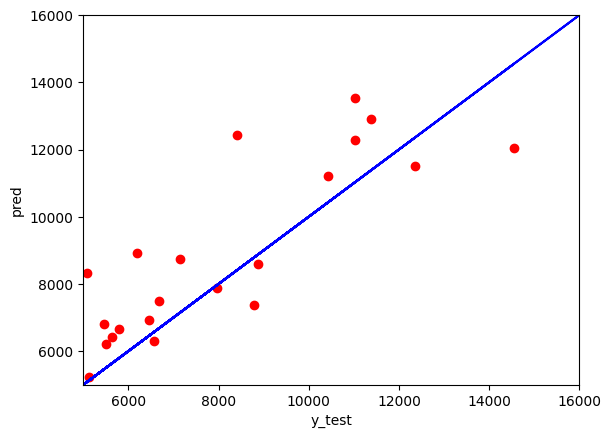

In [31]:
plt.scatter(y_test,pred,color="red",)
plt.xlim([5000,16000])
plt.ylim([5000,16000])
plt.xlabel('y_test')
plt.ylabel('pred')
plt.plot(y_test,y_test,color='blue')
plt.show()

In [32]:
# 모델 활용
job = pd.DataFrame([[12,10,80]],
                   columns=X_test.columns)

job

,education,women,prestige
0,12,10,80


In [33]:
pred = model.predict(job)
pred

array([13007.9197067])